# Exercise: computation with Numpy

With miscellaneous routines of scipy we can get an example image:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import face

raccoon = np.array(face())

/tmp/ipykernel_205864/3285978406.py:5: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  raccoon = np.array(face())


Write a script to print shape and dtype the raccoon image. Next plot the image
using matplotlib.

In [3]:
print("shape of raccoon = ", raccoon.shape)
print("dtype of raccoon = ", raccoon.dtype)

shape of raccoon =  (768, 1024, 3)
dtype of raccoon =  uint8


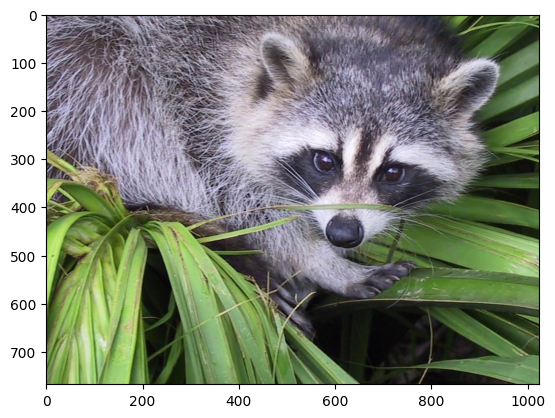

In [4]:
plt.imshow(raccoon);

0. Write a script to generate a border around the raccoon image (for example a 20
   pixel size black border; black color code is 0 0 0)

1. Do it again without losing pixels and generate then a raccoon1 array/image

2.1 Mask the face of the raccoon with a grey circle (centered of radius 240 at
location 690 260 of the raccoon1 image; grey color code is for example (120 120
120))

2.2 Mask the face of the raccoon with a grey square by using NumPy broadcast
capabilities (height and width 480 and same center as before)

3. We propose to smooth the image : the value of a pixel of the smoothed image is
   the the average of the values of its neighborhood (ie the 8 neighbors +
   itself).

## Solution 0

Write a script to generate a border around the raccoon image (for example a 20
pixel size black border; black color code is 0 0 0)

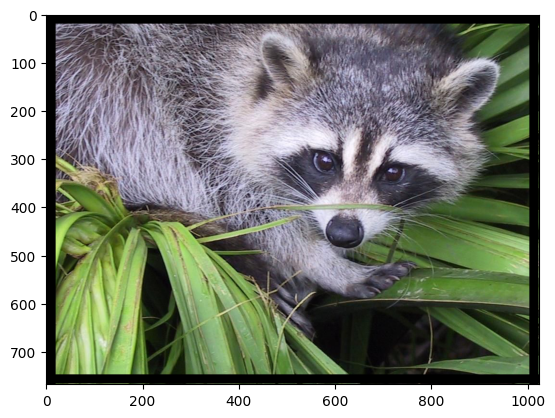

In [5]:
raccoon[0:20, :, :] = 0
raccoon[-20:-1, :, :] = 0
raccoon[:, 0:20, :] = 0
raccoon[:, -20:-1, :] = 0
plt.imshow(raccoon);

## Solution 1

Do it again without losing pixels and generate then a raccoon1 array/image

/tmp/ipykernel_205864/1497417816.py:1: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  raccoon = np.array(face())


shape of raccoon =  (768, 1024, 3)
shape of raccoon1 =  (808, 1064, 3)


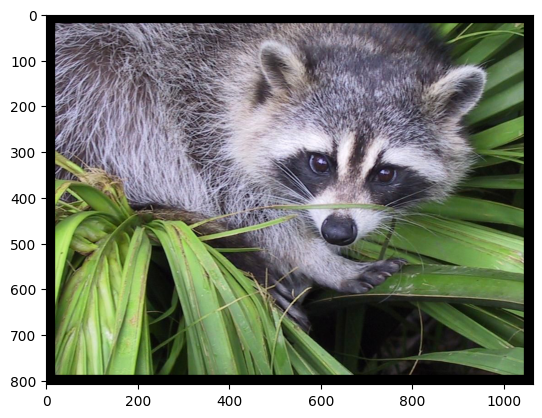

In [6]:
raccoon = np.array(face())
print("shape of raccoon = ", raccoon.shape)
n0, n1, n2 = raccoon.shape
raccoon1 = np.zeros((n0 + 40, n1 + 40, n2), dtype=np.uint8)
raccoon1[20 : 20 + n0, 20 : 20 + n1, :] = raccoon[:, :, :]
print("shape of raccoon1 = ", raccoon1.shape)
plt.imshow(raccoon1);

## Solution 2.A

Mask the face of the raccoon with a grey circle (centered of radius 240 at
location 690 260 of the raccoon1 image; grey color code is for example (120 120
120))

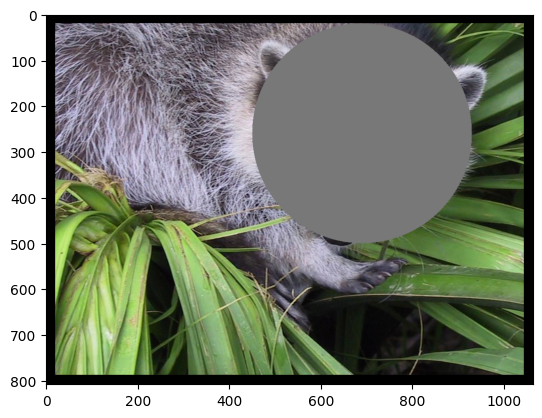

In [7]:
raccoon2A = raccoon1.copy()
x_center = 260
y_center = 690
radius = 240
x_max, y_max, z = raccoon2A.shape
for i in range(x_max):
    for j in range(y_max):
        if ((j - y_center) ** 2 + (i - x_center) ** 2) <= radius**2:
            raccoon2A[i, j, :] = 120
plt.imshow(raccoon2A);

## Solution 2.B

Mask the face of the raccon with a grey square by using NumPy broadcast
capabilities (height and width 480 and same center as before)

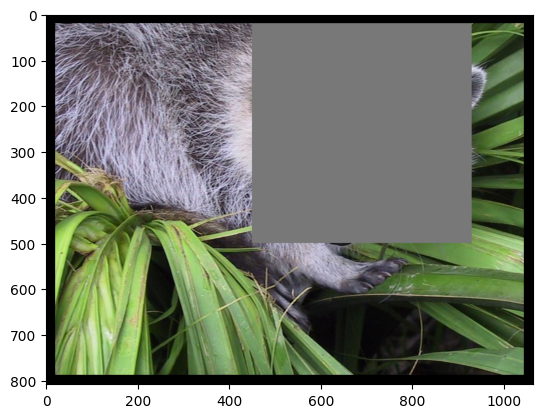

In [9]:
raccoon2B = raccoon1.copy()

raccoon2B[
    x_center - radius : x_center + radius, y_center - radius : y_center + radius, :
] = 120

plt.imshow(raccoon2B);

## Solution 3

We propose to smooth the image : the value of a pixel of the smoothed image is the
the average of the values of its neighborhood (ie the 8 neighbors + itself).

/tmp/ipykernel_205864/1077811224.py:1: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  raccoon = face().astype(np.uint16)


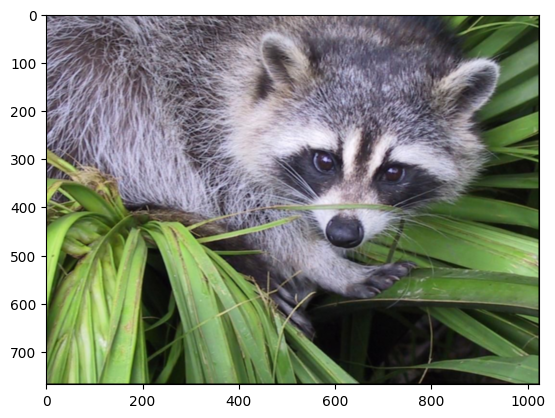

In [10]:
raccoon = face().astype(np.uint16)
n0, n1, n2 = raccoon.shape
raccoon1 = np.zeros((n0, n1, n2), dtype=np.uint8)
for i in range(n0):
    for j in range(n1):
        if (i != 0) and (i != n0 - 1) and (j != 0) and (j != n1 - 1):
            tmp = (
                raccoon[i, j]
                + raccoon[i + 1, j]
                + raccoon[i - 1, j]
                + raccoon[i, j + 1]
                + raccoon[i, j - 1]
                + raccoon[i + 1, j + 1]
                + raccoon[i - 1, j - 1]
                + raccoon[i + 1, j - 1]
                + raccoon[i - 1, j + 1]
            )
            raccoon1[i, j] = tmp / 9
plt.imshow(raccoon1);

## Extra :

- Try to optimize (vectorization can be a solution)

- You can check what is a "sum area table" (or integral image)
  https://en.wikipedia.org/wiki/Summed-area_table and how to use it in our
  example.

- compute the area image (check the "cumsum" numpy function)

- use it to smooth your image.

### Solution extra

In [11]:
raccoon = face()


def smooth_loop(method, niter, img):
    for i in range(niter):
        img = method(img)
    return img

/tmp/ipykernel_205864/894468884.py:1: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  raccoon = face()


In [12]:
def smooth(img):
    img = img.astype(np.uint16)
    n0, n1, n2 = img.shape
    img1 = np.zeros((n0, n1, n2), dtype=np.uint16)
    for i in range(n0):
        for j in range(n1):
            if (i != 0) and (i != n0 - 1) and (j != 0) and (j != n1 - 1):
                tmp = (
                    img[i, j]
                    + img[i + 1, j]
                    + img[i - 1, j]
                    + img[i, j + 1]
                    + img[i, j - 1]
                    + img[i + 1, j + 1]
                    + img[i - 1, j - 1]
                    + img[i + 1, j - 1]
                    + img[i - 1, j + 1]
                )
                img1[i, j] = tmp / 9
    return img1.astype(np.uint8)

In [13]:
raccoon = face()
%timeit smooth_loop(smooth, 1, raccoon)

/tmp/ipykernel_205864/3325106580.py:1: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  raccoon = face()


6.3 s ± 2.76 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [14]:
def smooth_vectorize(img):
    img = img.astype(np.uint16)
    n0, n1, n2 = img.shape
    img1 = np.zeros((n0, n1, n2), dtype=np.uint16)
    img1[1 : n0 - 1, 1 : n1 - 1] = (
        img[1 : n0 - 1, 1 : n1 - 1]
        + img[2:n0, 1 : n1 - 1]
        + img[0 : n0 - 2, 1 : n1 - 1]
        + img[1 : n0 - 1, 2:n1]
        + img[1 : n0 - 1, 0 : n1 - 2]
        + img[2:n0, 2:n1]
        + img[0 : n0 - 2, 0 : n1 - 2]
        + img[2:n0, 0 : n1 - 2]
        + img[0 : n0 - 2, 2:n1]
    )
    img1 = img1 / 9
    return img1.astype(np.uint8)

raccoon = face()
%timeit smooth_loop(smooth_vectorize, 10, raccoon)

/tmp/ipykernel_205864/2107563002.py:19: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  raccoon = face()


92.3 ms ± 2.12 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [15]:
from scipy import signal

def smooth_fft_convolve(img):
    img = img.astype(np.uint16)
    square8 = np.ones((3, 3), dtype=np.uint16)
    for i in range(3):
        img[:, :, i] = signal.fftconvolve(img[:, :, i], square8, mode="same") / 9
    return img.astype(np.uint8)


%timeit smooth_loop(smooth_fft_convolve, 10, raccoon)

1.07 s ± 15.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [16]:
def smooth_conv2D(img):
    img = img.astype(np.uint16)
    n0, n1, n2 = img.shape
    img1 = np.zeros((n0, n1, n2), dtype=np.uint16)
    square8 = np.ones((3, 3), dtype=np.uint16)
    for i in range(3):
        img1[:, :, i] = signal.convolve2d(img[:, :, i], square8, mode="same") / 9
    return img1.astype(np.uint8)


%timeit smooth_loop(smooth_conv2D, 10, raccoon)

985 ms ± 2.27 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [17]:
def smooth_cumul(img):
    img = img.astype(np.uint16)
    n0, n1, n2 = img.shape
    img1 = np.empty((n0, n1, n2), dtype=np.uint16)
    sum_area = np.cumsum(np.cumsum(img, axis=0), axis=1)
    img1[2 : n0 - 1, 2 : n1 - 1] = (
        sum_area[3:n0, 3:n1]
        + sum_area[0 : n0 - 3, 0 : n1 - 3]
        - sum_area[3:n0, 0 : n1 - 3]
        - sum_area[0 : n0 - 3, 3:n1]
    )
    img1 = img1 / 9
    return img1.astype(np.uint8)

%timeit smooth_loop(smooth_cumul, 10, raccoon)

574 ms ± 7.18 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


One of the advantages of the cumulative images is that once the cumulative image is created, it can be re-used. For instance, to compute a time serie with differents window size, you could use the same cumulative image. Here it does not give any advantage though...

## Visual check


In [ ]:
## apply the smoothing function several times so that the smoothing is obvious
smooth_img_10 = smooth_loop(smooth1, 10, face())
smooth_img_50 = smooth_loop(smooth1, 50, face())

plt.title('Original image')
plt.imshow(face())
plt.savefig('rough_raccoon.pdf')
plt.show()

plt.title('Smoothened 10 times')
plt.imshow(smooth_img_10)
plt.show()

plt.title('Smoothened 50 times')
plt.imshow(smooth_img_50)
plt.savefig('smooth_raccoon_50.pdf')
plt.show()


## Numba

In [ ]:
import numba

@numba.njit()
def smooth_numba(img):
    img = img.astype(np.uint16)
    n0, n1, n2 = img.shape
    img1 = np.zeros((n0, n1, n2), dtype=np.uint16)
    for i in range(n0):
        for j in range(n1):
            if (i != 0) and (i != n0 - 1) and (j != 0) and (j != n1 - 1):
                tmp = (
                    img[i, j]
                    + img[i + 1, j]
                    + img[i - 1, j]
                    + img[i, j + 1]
                    + img[i, j - 1]
                    + img[i + 1, j + 1]
                    + img[i - 1, j - 1]
                    + img[i + 1, j - 1]
                    + img[i - 1, j + 1]
                )
                img1[i, j] = tmp / 9
    return img1.astype(np.uint8)

In [ ]:
# call the Numba function a frist time so that the compilation time is not included
smooth_numba(raccoon)
# After compilation launch the timer
%timeit smooth_loop(smooth_numba, 10, raccoon)

In [ ]:
import numba

@numba.njit()
def smooth_numba(img):
    img = img.astype(np.uint16)
    n0, n1, n2 = img.shape
    img1 = np.zeros((n0, n1, n2), dtype=np.uint16)
    for i in range(n0):
        for j in range(n1):
            if (i != 0) and (i != n0 - 1) and (j != 0) and (j != n1 - 1):
                tmp = (
                    img[i, j]
                    + img[i + 1, j]
                    + img[i - 1, j]
                    + ...
                )
                img1[i, j] = tmp / 9
    return img1.astype(np.uint8)

In [ ]:
import numba

@numba.njit()
def original_function(img):